# About The Data Set

1. user_id - a unique id for the customer
2. item_id - unique product id
3. weight - weight measurement of customer
4. rented for - purpose clothing was rented for
5. body type - body type of customer
6. review_text - review given by the customer
7. size - the standardized size of the product
8. rating - rating for the product
9. age - age of the customer
10. category - the category of the product
11. bust size - bust measurement of customer
12. height - height of the customer
13. review_date - date when the review was written
14. fit - fit feedback

## 1. Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


## 2. Load the data

In [2]:
df = pd.read_csv('renttherunway.csv', index_col=0)
df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [3]:
df.describe()

,user_id,item_id,rating,size,age
count,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192482 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192199 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 23.5+ MB


In [5]:
df.shape

(192544, 15)

## 3. Check if there are any duplicate records in the dataset

In [6]:
len(df[df.duplicated()])

189

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
len(df[df.duplicated()])

0

## 4. Drop the redundant columns for the analysis.
### (Hint: drop columns like ‘id’, ‘review’)

In [9]:
df.drop(columns=['user_id', 'item_id', 'review_text', 'review_summary', 'review_date'],inplace=True)

# df['fit'].unique()


In [10]:
df

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,140lbs,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0
192540,fit,32c,100lbs,10.0,work,petite,dress,"5' 1""",4,29.0
192541,fit,36a,135lbs,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0
192542,fit,36c,165lbs,10.0,wedding,pear,dress,"5' 6""",16,31.0


## 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs)

In [11]:
df['weight'] = df['weight'].str.replace('lbs','')
df['weight'] = df['weight'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192355 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192355 non-null  object 
 1   bust size   173963 non-null  object 
 2   weight      162400 non-null  float64
 3   rating      192274 non-null  float64
 4   rented for  192345 non-null  object 
 5   body type   177730 non-null  object 
 6   category    192355 non-null  object 
 7   height      191680 non-null  object 
 8   size        192355 non-null  int64  
 9   age         191395 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 16.1+ MB


## 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'.

In [12]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [13]:
df['rented for'] = df['rented for'].replace(['party: cocktail'],'party')

In [14]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

## 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [15]:
df['height']

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192355, dtype: object

In [16]:
def to_inch(h):
    if(isinstance(h, str)):
        splitVals = h.split("'")
        length = (float(splitVals[0]) * 12) + (float(splitVals[1][-2]))
        return length
    
df['height'] = df['height'].apply(to_inch)
df['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192355, dtype: float64

## 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [17]:
df.isna().sum()

fit               0
bust size     18392
weight        29955
rating           81
rented for       10
body type     14625
category          0
height          675
size              0
age             960
dtype: int64

In [18]:
df['weight'] = df['weight'].fillna(df['weight'].mean())
df['height'] = df['height'].fillna(df['height'].mean())
df['age'] = df['age'].fillna(df['age'].mean())
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['body type'].fillna('other', inplace=True)
df.isna().sum()

fit               0
bust size     18392
weight            0
rating            0
rented for       10
body type         0
category          0
height            0
size              0
age               0
dtype: int64

In [19]:
df['bust size'].fillna(df['bust size'].mode()[0], inplace=True)
df['rented for'].fillna('other', inplace=True)

In [20]:
df.isna().sum()

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

In [21]:
df.info()
# df = df.fillna('unspecified')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192355 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192355 non-null  object 
 1   bust size   192355 non-null  object 
 2   weight      192355 non-null  float64
 3   rating      192355 non-null  float64
 4   rented for  192355 non-null  object 
 5   body type   192355 non-null  object 
 6   category    192355 non-null  object 
 7   height      192355 non-null  float64
 8   size        192355 non-null  int64  
 9   age         192355 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 16.1+ MB


## 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [22]:
cat = df.select_dtypes(include='O').columns.to_list()
df_categorical = df[cat]
num = df.select_dtypes(exclude='O').columns.to_list()
df_numerical = df[num]
print(cat)
print(num)

['fit', 'bust size', 'rented for', 'body type', 'category']
['weight', 'rating', 'height', 'size', 'age']


In [23]:
df_categorical.describe()

,fit,bust size,rented for,body type,category
count,192355,192355,192355,192355,192355
unique,3,106,8,8,68
top,fit,34b,wedding,hourglass,dress
freq,141909,45647,57737,55290,92752


In [24]:
df_numerical.describe()

,weight,rating,height,size,age
count,192355.000000,192355.000000,192355.0000,192355.000000,192355.000000
mean,137.392445,9.092327,64.7173,12.245801,33.869965
std,20.124879,1.429801,2.8611,8.496299,8.038306
min,50.000000,2.000000,48.0000,0.000000,0.000000
25%,125.000000,8.000000,63.0000,8.000000,29.000000
50%,137.392445,10.000000,65.0000,12.000000,32.000000
75%,145.000000,10.000000,67.0000,16.000000,37.000000
max,300.000000,10.000000,78.0000,58.000000,117.000000


## 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

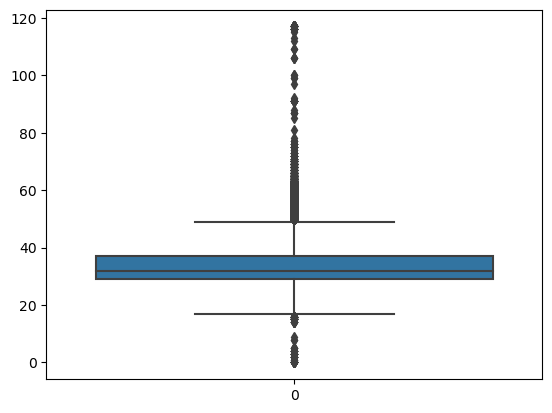

In [25]:
sns.boxplot(df['age'])
plt.show()

In [26]:
# df['age'] = np.log(df['age'])
# sns.boxplot(df['age'])
# plt.show()

In [27]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1

In [28]:
lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)
df_out = df.loc[(df['age'] < upper_whisker) & (df['age'] > lower_whisker)]

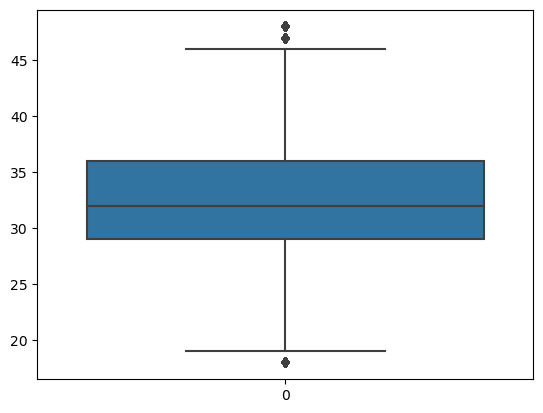

In [29]:
sns.boxplot(df_out['age'])
plt.show()

## 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

<Axes: ylabel='rented for'>

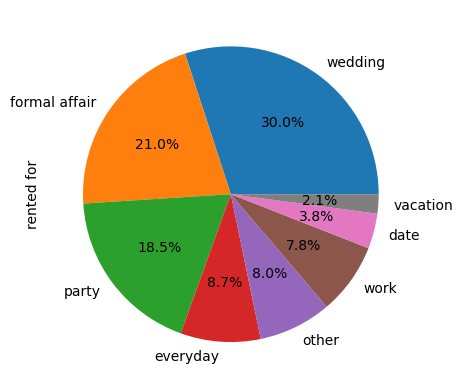

In [30]:
# sns.distplot(df['rented for'])
# plt.show()


df['rented for'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [31]:
df.columns
dfc = df.copy()
dfc

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.000000,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.000000,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,34b,137.392445,10.0,party,other,sheath,64.0,4,116.0
3,fit,34c,135.000000,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145.000000,10.0,wedding,athletic,gown,69.0,12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,140.000000,10.0,work,hourglass,jumpsuit,69.0,8,42.0
192540,fit,32c,100.000000,10.0,work,petite,dress,61.0,4,29.0
192541,fit,36a,135.000000,6.0,everyday,straight & narrow,dress,68.0,8,31.0
192542,fit,36c,165.000000,10.0,wedding,pear,dress,66.0,16,31.0


## 12. Encode the categorical variables in the dataset.

In [32]:
labelEncode = LabelEncoder()

for i in cat:
    df[i] = df[[i]].apply(labelEncode.fit_transform)

In [33]:
df

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.000000,10.0,5,3,44,68.0,14,28.0
1,0,37,132.000000,10.0,3,7,20,66.0,12,36.0
2,0,37,137.392445,10.0,4,4,45,64.0,4,116.0
3,0,38,135.000000,8.0,2,5,16,65.0,8,34.0
4,0,37,145.000000,10.0,6,1,20,69.0,12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,0,41,140.000000,10.0,7,3,26,69.0,8,42.0
192540,0,25,100.000000,10.0,7,6,16,61.0,4,29.0
192541,0,48,135.000000,6.0,1,7,16,68.0,8,31.0
192542,0,51,165.000000,10.0,6,5,16,66.0,16,31.0


## 13. Standardize the data, so that the values are within a particular range.

In [34]:
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
scaled_features_df.head(3)

scaled_features_df.shape

(192355, 10)

## 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [35]:
#Calculate the covariance matrix
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00000520e+00,  9.08035847e-03,  1.34182049e-02,
        -2.44921448e-01,  8.41594826e-03, -7.32219994e-03,
         1.40324527e-04, -1.25148427e-03,  6.53740586e-02,
         1.71469970e-03],
       [ 9.08035847e-03,  1.00000520e+00,  5.74182013e-01,
        -2.09849178e-02, -1.92369943e-03, -2.30365449e-01,
        -1.09910721e-02,  9.33003261e-02,  6.27129781e-01,
         1.65518225e-01],
       [ 1.34182049e-02,  5.74182013e-01,  1.00000520e+00,
        -2.06501067e-02,  9.88310300e-03, -2.46484973e-01,
        -1.47767397e-02,  2.17926997e-01,  7.32736769e-01,
         6.13125666e-02],
       [-2.44921448e-01, -2.09849178e-02, -2.06501067e-02,
         1.00000520e+00,  1.28869939e-02,  6.23707935e-03,
        -2.35413033e-02,  9.42572095e-03, -3.67075722e-02,
        -3.51818140e-02],
       [ 8.41594826e-03, -1.92369943e-03,  9.88310300e-03,
         1.28869939e-02,  1.00000520e+00, -5.04719414e-03,
        -5.75772610e-02, -8.36507592e-03,  5.00279718e-03,
        -3.

In [36]:
# Calculate EigenValues
eigValues, eigVectors = np.linalg.eig(cov_matrix)
print('Eigen Values: ','\n',eigValues)
print('\n')
print('Eigen Vectors: ','\n',eigVectors)

Eigen Values:  
 [2.50012683 0.25154086 0.4306984  1.24870413 0.75260204 1.08282489
 1.01983221 0.94473806 0.91376735 0.85521721]


Eigen Vectors:  
 [[-3.97346932e-02 -5.35415757e-02  3.30617252e-02 -6.88075423e-01
  -6.95841903e-01  1.73307794e-01 -6.97140535e-02  2.98117799e-02
  -3.19934110e-02  3.11022889e-03]
 [-5.11225500e-01 -1.13556013e-01  8.18557361e-01  2.57555323e-02
   2.52630816e-02 -5.55598413e-02  1.73215751e-01 -3.40215873e-02
  -1.41656838e-01  1.00536301e-02]
 [-5.45491218e-01 -6.55112478e-01 -4.60198518e-01  4.97606010e-02
   3.79433728e-02  6.71667479e-02 -2.86695785e-02 -3.68524292e-02
  -1.94027654e-01  1.15023175e-01]
 [ 3.79845245e-02 -7.03941764e-03 -3.54370893e-04  7.00108442e-01
  -7.07746908e-01 -4.02048543e-02  4.81822864e-02 -3.03515437e-02
  -4.96425991e-02  1.12433973e-02]
 [-1.20427028e-03  4.11706883e-04  8.76942894e-03  4.71202167e-02
   3.56438411e-02  6.18894920e-01  2.98767801e-01 -6.25633305e-01
   3.49707165e-01  1.02104966e-01]
 [ 2.72516391e-

In [37]:
total=sum(eigValues)
var_exp = [(i/total)*100 for i in sorted(eigValues,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ', var_exp)
print("\n")
print('Cumulative Explained Variance: ', cum_var_exp)

Explained Variance:  [25.001138357628278, 12.486976388396775, 10.828192645975719, 10.19826911963005, 9.447331470541343, 9.137625982008071, 8.552127601810803, 7.525981262435089, 4.306961599862691, 2.515395571711196]


Cumulative Explained Variance:  [ 25.00113836  37.48811475  48.31630739  58.51457651  67.96190798
  77.09953396  85.65166157  93.17764283  97.48460443 100.        ]


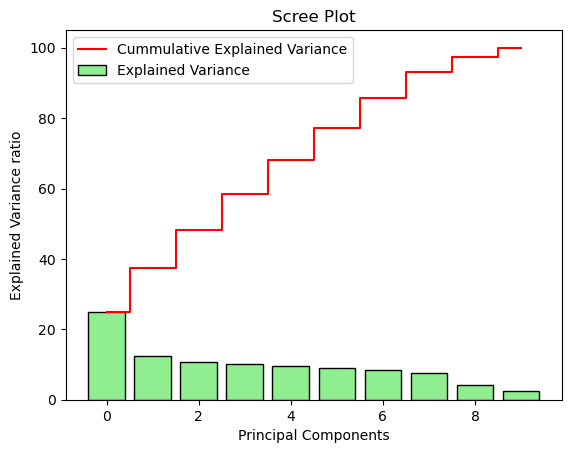

In [38]:
plt.bar(range(10),var_exp, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(10),cum_var_exp, where='mid', color='red', label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

## 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)

#### 15 a. Find the optimal K Value using elbow plot for K Means clustering.

In [39]:
pca = PCA(n_components=8)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.196300,-0.899321,0.147780,-1.445884,1.420396,0.165390,-0.483335,-0.054172
1,-0.685618,-0.731580,0.415821,0.371660,-0.630596,-0.351474,-1.717591,-0.064411
2,0.654549,0.277446,5.888113,4.414321,-0.255141,6.924690,-1.470176,-1.029686
3,-0.588094,0.179625,0.344782,0.047977,-1.110327,-0.372214,-0.549624,0.945851
4,0.528295,-1.219466,-1.447405,-1.311685,0.297078,0.791974,0.255802,0.062919


In [40]:
cluster_errors = []
cluster_range = range(1, 15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

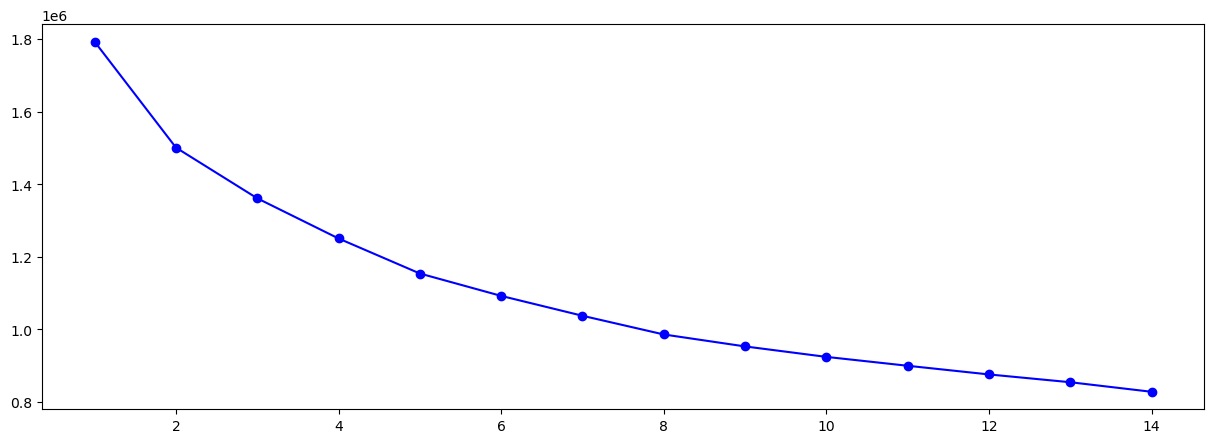

In [41]:
cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker='o', color='b')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [43]:
kmeans.labels_

array([2, 2, 0, ..., 2, 0, 0])

#### 15 b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.

In [44]:
# Creating a dataframe of the labels
label = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
label.head(5)

,Labels
0,2
1,2
2,0
3,2
4,2


In [45]:
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Labels
0,0.196300,-0.899321,0.147780,-1.445884,1.420396,0.165390,-0.483335,-0.054172,2
1,-0.685618,-0.731580,0.415821,0.371660,-0.630596,-0.351474,-1.717591,-0.064411,2
2,0.654549,0.277446,5.888113,4.414321,-0.255141,6.924690,-1.470176,-1.029686,0
3,-0.588094,0.179625,0.344782,0.047977,-1.110327,-0.372214,-0.549624,0.945851,2
4,0.528295,-1.219466,-1.447405,-1.311685,0.297078,0.791974,0.255802,0.062919,2


In [47]:
kmeans_df['Labels'].value_counts()

2    103040
0     55185
1     34130
Name: Labels, dtype: int64

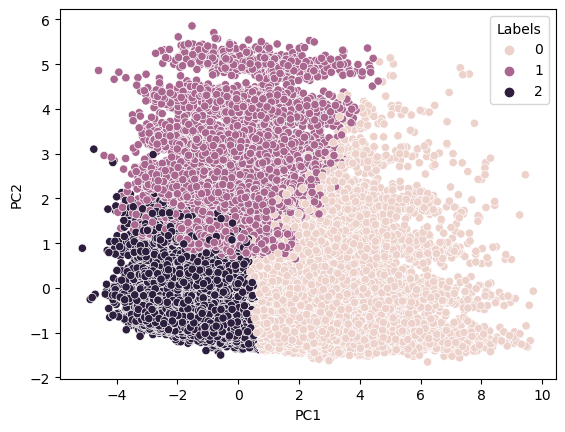

In [48]:
sns.scatterplot(data=kmeans_df,x=kmeans_df['PC1'],y=kmeans_df['PC2'],hue='Labels')
plt.show()

#### 15 c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [49]:
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(kmeans_df)
    labels = kmeans.predict(kmeans_df)
    print(i,silhouette_score(kmeans_df,labels))

2 0.22139665053037377
3 0.22280965877538117
4 0.15513194325340826
5 0.15043224445946066
6 0.14841361927553418
7 0.153875486601428
8 0.15516401048043954
9 0.13970767689377148
10 0.1372567243304129
11 0.13945892378444152
12 0.13180986086952126
13 0.13974025368153728
14 0.13677075638273758


#### Silhoutte score for KMeans is high at cluster 3

## 16. Apply Agglomerative clustering and segment the data.

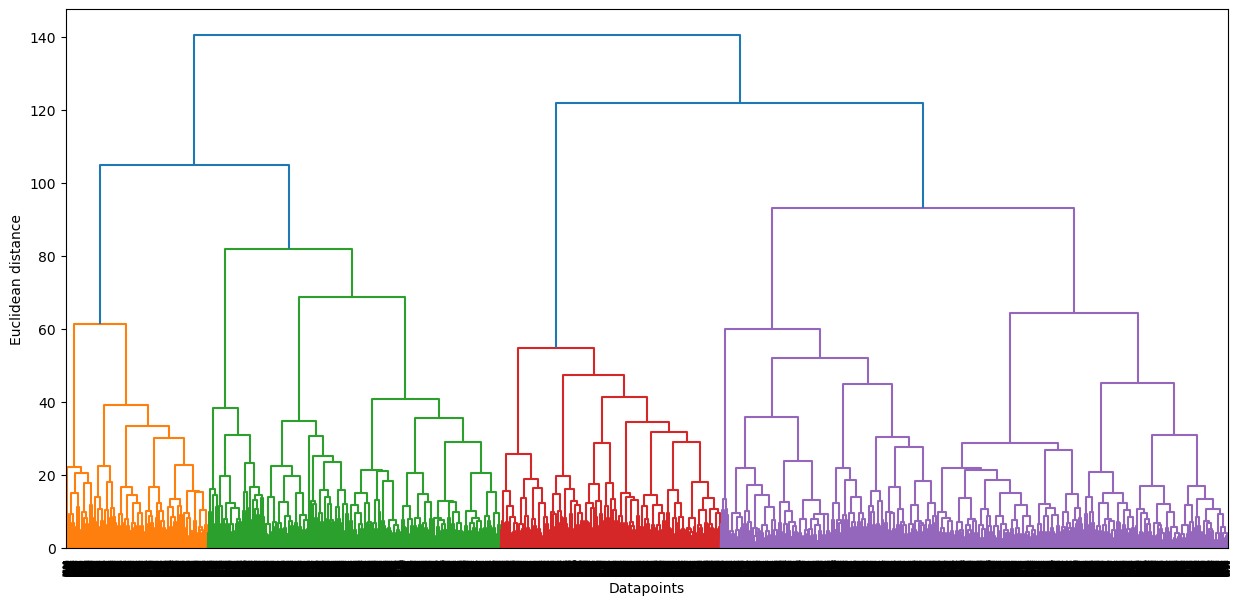

In [82]:
import numpy as np
np.random.seed(0)
sampled_data = scaled_features_df.sample(n=10000,replace=False)
plt.figure(figsize=[15,7])
merg = linkage(sampled_data,method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [51]:
from sklearn.metrics import silhouette_score

In [63]:
for i in range(2, 13):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(sampled_data)
    labels2 = hier.fit_predict(sampled_data)
    print(i, silhouette_score(sampled_data, labels2))

2 0.11052107569661877
3 0.10379171697711403
4 0.11267486522097826
5 0.07030322372326318
6 0.07043641796427844
7 0.06606012962289669
8 0.04482264966191639
9 0.049502370157523616
10 0.05572050971329552
11 0.0602182850864816
12 0.05903685428684762


#### - Silhoutte score for agglomerative clustering is high at cluster 4

In [50]:
## Building hierarchical clustering model using the optimal clusters as 4
hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(sampled_data)

In [51]:
## Creating a dataframe of the labels
df_label2 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels2'])
df_label2.head(5)


,Labels2
0,1
1,0
2,0
3,0
4,0


In [52]:
# Joining the label dataframe with unscaled initial cleaned dataframe 
df_hier = dfc.join(df_label2)
df_hier.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels2
0,fit,34d,137.000000,10.0,vacation,hourglass,romper,68.0,14,28.0,1.0
1,fit,34b,132.000000,10.0,other,straight & narrow,gown,66.0,12,36.0,0.0
2,fit,34b,137.392445,10.0,party,other,sheath,64.0,4,116.0,0.0
3,fit,34c,135.000000,8.0,formal affair,pear,dress,65.0,8,34.0,0.0
4,fit,34b,145.000000,10.0,wedding,athletic,gown,69.0,12,27.0,0.0


## 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results.

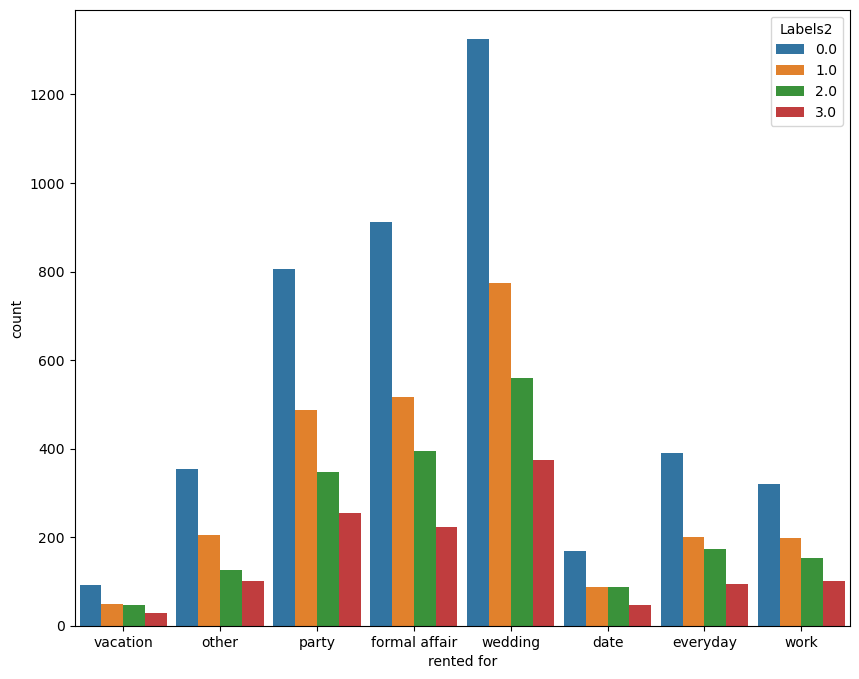

In [74]:
# sns.barplot(x=df_hier['Labels2'],y=df_hier['rented for'])
# plt.show()
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x=df_hier['rented for'], hue='Labels2', data=df_hier, width=0.9, ax=ax)
# plt.figure(figsize=(5.5,2.5))
plt.show()

- The plot above shows that the wedding was the occassion where large number people had rented the clothes for.
- the large number falls in label 0

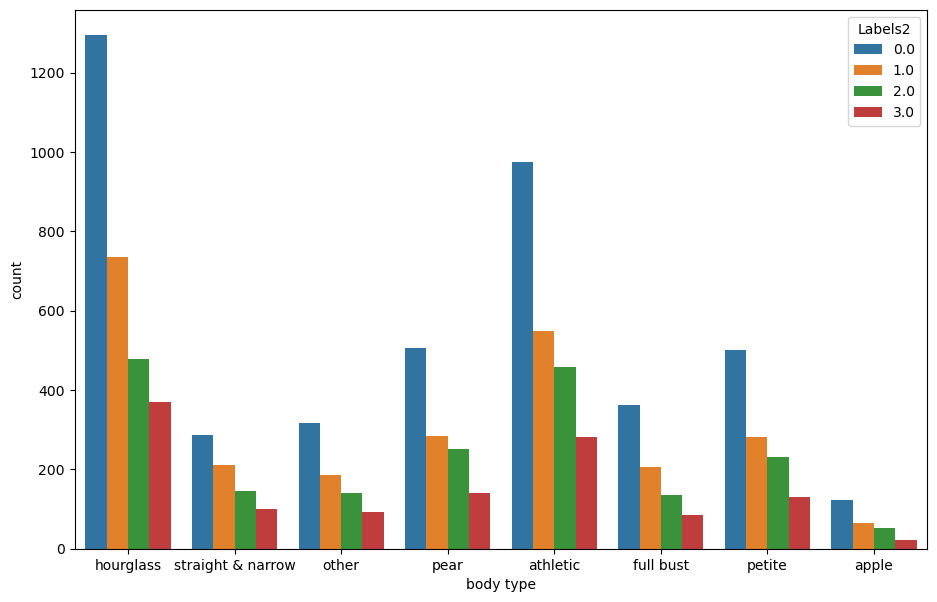

In [77]:
# sns.barplot(x=df_hier['Labels2'],y=df_hier['body type'])
# plt.show()
fig, ax = plt.subplots(figsize=(11, 7))
sns.countplot(x=df_hier['body type'], hue='Labels2', data=df_hier,ax=ax)
plt.show()

- Large number of women rented clothes had 'hourglass' body type followed by those with 'athletic' type
- Majority of the data point is in cluster 0

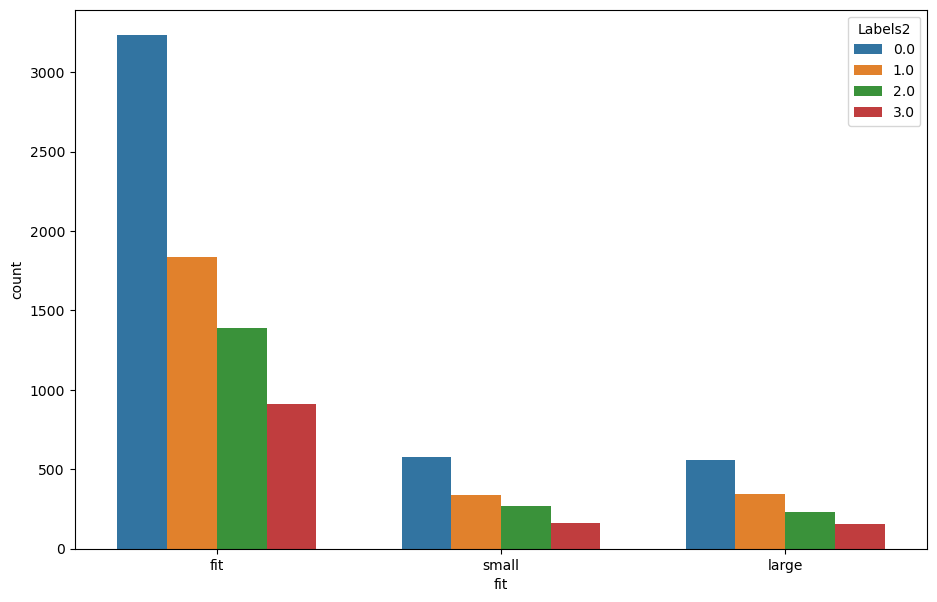

In [80]:
fig, ax = plt.subplots(figsize=(11, 7))
sns.countplot(x=df_hier['fit'], hue='Labels2', data=df_hier, width=0.7, ax=ax)
plt.show()

- Large number of women rented clothes of fit type. followed by small fit.
- Majority of the data point is in cluster 0

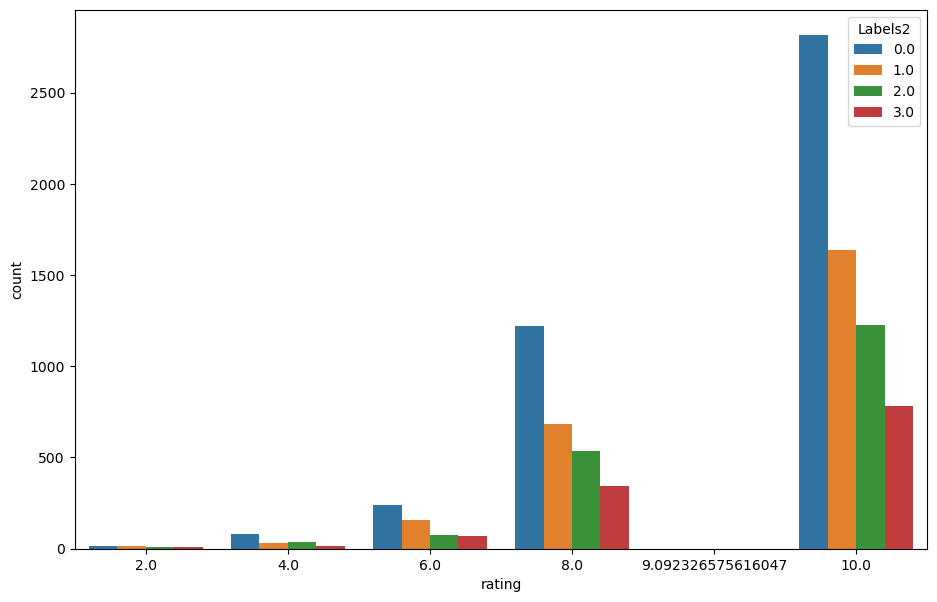

In [81]:
fig, ax = plt.subplots(figsize=(11, 7))
sns.countplot(x=df_hier['rating'], hue='Labels2', data=df_hier, ax=ax)
plt.show()

- Large number of women rented clothes gave 10 as rating followed by 8 rating. No one gave 9 rating.
- Majority of the data point is in cluster 0

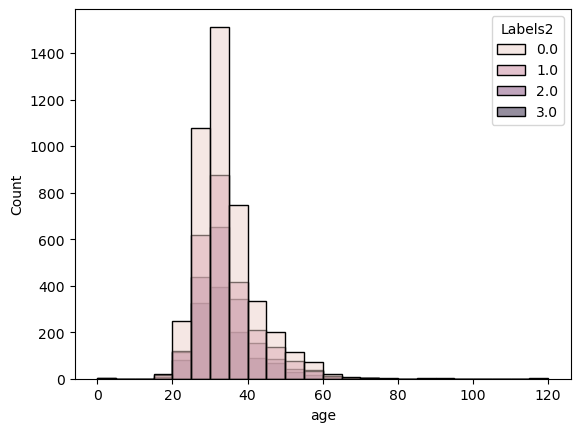

In [75]:
sns.histplot(data=df_hier, x=df_hier['age'], hue='Labels2',binwidth=5)
plt.show()

- Large number of women rented clothes were in the age range of  30 - 35.
- Majority of the data point is in cluster 0

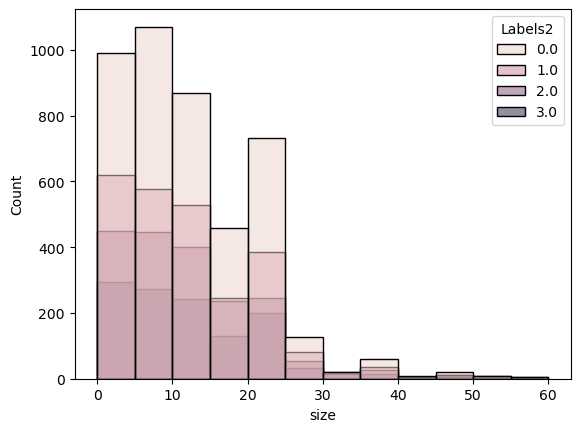

In [76]:
sns.histplot(data=df_hier, x=df_hier['size'], hue='Labels2',binwidth=5)
plt.show()

- The data point suggest size range of the clothes that were rented were of 9-10.
- Majority of the data point is in cluster 0

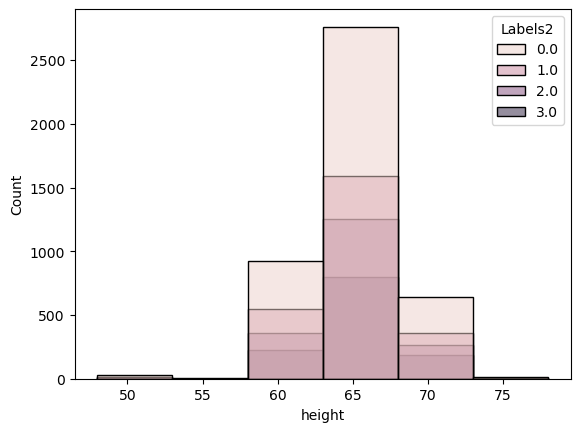

In [77]:
sns.histplot(data=df_hier, x=df_hier['height'], hue='Labels2',binwidth=5)
plt.show()

- The majority of women who rented clothes had height of 65 inch
- Majority of the data point is in cluster 0